# Singapore resale price prediction - Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
import datetime
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle


In [6]:
#SIngapore HDB resale data from (1990-2024)
df1=pd.read_csv(r"D:\GUVI\Capstone Project\Singapore Resale Flat Prices Prediction\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df1.info()
df1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [7]:
df2=pd.read_csv(r"D:\GUVI\Capstone Project\Singapore Resale Flat Prices Prediction\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df2.info()
df2.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [8]:
df3=pd.read_csv(r"D:\GUVI\Capstone Project\Singapore Resale Flat Prices Prediction\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df3.info()
df3.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [9]:
df4=pd.read_csv(r"D:\GUVI\Capstone Project\Singapore Resale Flat Prices Prediction\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4.info()
df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [10]:
df5=pd.read_csv(r"D:\GUVI\Capstone Project\Singapore Resale Flat Prices Prediction\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df5.info()
df5.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183650 entries, 0 to 183649
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                183650 non-null  object 
 1   town                 183650 non-null  object 
 2   flat_type            183650 non-null  object 
 3   block                183650 non-null  object 
 4   street_name          183650 non-null  object 
 5   storey_range         183650 non-null  object 
 6   floor_area_sqm       183650 non-null  float64
 7   flat_model           183650 non-null  object 
 8   lease_commence_date  183650 non-null  int64  
 9   remaining_lease      183650 non-null  object 
 10  resale_price         183650 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.4+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [11]:
df5['remaining_lease']=df5['remaining_lease'].str.split(' ').str[0].astype(int)
df5.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0


In [12]:
#combine the dataset using concat

df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929853 entries, 0 to 929852
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929853 non-null  object 
 1   town                 929853 non-null  object 
 2   flat_type            929853 non-null  object 
 3   block                929853 non-null  object 
 4   street_name          929853 non-null  object 
 5   storey_range         929853 non-null  object 
 6   floor_area_sqm       929853 non-null  float64
 7   flat_model           929853 non-null  object 
 8   lease_commence_date  929853 non-null  int64  
 9   resale_price         929853 non-null  float64
 10  remaining_lease      220803 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.0+ MB


In [13]:
#Spliting colums
df[['year','month']]=df['month'].str.split('-',expand=True) #split the year in the month column
df['block'] = df['block'].str.split(r'(\D)', expand=True)[0].astype('int64') #r'(\D)' splits a string at the first non-digit character.

df[['storey_start','storey_end']]=df['storey_range'].str.split('TO',expand=True) #split the storeyrange

#changing the following columns into numeric
df['month']=pd.to_numeric(df['month'])
df['year']=pd.to_numeric(df['year'])
df['floor_area_sqm']=pd.to_numeric(df['floor_area_sqm'])
df['resale_price']=pd.to_numeric(df['resale_price'])
df['storey_start']=pd.to_numeric(df['storey_start'])
df['storey_end']=pd.to_numeric(df['storey_end'])

df.drop(columns='storey_range',inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929853 entries, 0 to 929852
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                929853 non-null  int64  
 1   town                 929853 non-null  object 
 2   flat_type            929853 non-null  object 
 3   block                929853 non-null  int64  
 4   street_name          929853 non-null  object 
 5   floor_area_sqm       929853 non-null  float64
 6   flat_model           929853 non-null  object 
 7   lease_commence_date  929853 non-null  int64  
 8   resale_price         929853 non-null  float64
 9   remaining_lease      220803 non-null  float64
 10  year                 929853 non-null  int64  
 11  storey_start         929853 non-null  int64  
 12  storey_end           929853 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 92.2+ MB


In [14]:
df['block'].max() 


999

In [15]:
#checkig null values
df.isnull().sum()


month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
storey_start                0
storey_end                  0
dtype: int64

In [54]:
#handle the null values 
df['remaining_lease'].fillna(99-(df['year']-df['lease_commence_date']),inplace=True)

mask= df['remaining_lease']>99
df=df[~mask]  #remaining_lease exceeds 99 years- are unrealistic. 

KeyError: 'remaining_lease'

In [17]:
df.isnull().sum()


month                  0
town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
storey_start           0
storey_end             0
dtype: int64

In [18]:
df.dtypes


month                    int64
town                    object
flat_type               object
block                    int64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
storey_start             int64
storey_end               int64
dtype: object

In [19]:
#handle the str error
df['flat_model']=df['flat_model'].str.upper()
df['flat_type']=df['flat_type'].replace({'MULTI GENERATION': 'MULTI-GENERATION'})

# Adding a new feature to improve results
df['price_per_sqm']=df['resale_price']/df['floor_area_sqm']
df['years_holding']=df['year']-df['lease_commence_date']
current_year =datetime.datetime.now().year

df['current_remaining_lease']=df['remaining_lease']-(current_year-df['year'])
df['age_of_property']=current_year-df['lease_commence_date']


In [20]:
df


,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,storey_start,storey_end,price_per_sqm,years_holding,current_remaining_lease,age_of_property
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0,47
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0,47
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0,47
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0,47
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929848,7,YISHUN,5 ROOM,755,YISHUN ST 72,122.0,IMPROVED,1986,670000.0,61.0,2024,4,6,5491.803279,38,61.0,38
929849,7,YISHUN,EXECUTIVE,406,YISHUN AVE 6,148.0,MAISONETTE,1988,830800.0,63.0,2024,4,6,5613.513514,36,63.0,36
929850,7,YISHUN,EXECUTIVE,406,YISHUN AVE 6,142.0,APARTMENT,1988,838000.0,63.0,2024,10,12,5901.408451,36,63.0,36
929851,7,YISHUN,EXECUTIVE,792,YISHUN RING RD,147.0,APARTMENT,1987,820000.0,62.0,2024,7,9,5578.231293,37,62.0,37


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 929802 entries, 0 to 929852
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    929802 non-null  int64  
 1   town                     929802 non-null  object 
 2   flat_type                929802 non-null  object 
 3   block                    929802 non-null  int64  
 4   street_name              929802 non-null  object 
 5   floor_area_sqm           929802 non-null  float64
 6   flat_model               929802 non-null  object 
 7   lease_commence_date      929802 non-null  int64  
 8   resale_price             929802 non-null  float64
 9   remaining_lease          929802 non-null  float64
 10  year                     929802 non-null  int64  
 11  storey_start             929802 non-null  int64  
 12  storey_end               929802 non-null  int64  
 13  price_per_sqm            929802 non-null  float64
 14  years_hol

In [22]:
df['town'].value_counts()


town
TAMPINES           80169
YISHUN             70260
JURONG WEST        66866
BEDOK              66802
WOODLANDS          65707
ANG MO KIO         52189
HOUGANG            50905
BUKIT BATOK        44596
CHOA CHU KANG      38460
BUKIT MERAH        34457
PASIR RIS          33272
SENGKANG           32669
TOA PAYOH          31621
QUEENSTOWN         28831
GEYLANG            28249
CLEMENTI           28095
BUKIT PANJANG      27770
KALLANG/WHAMPOA    27286
JURONG EAST        24834
SERANGOON          22873
BISHAN             21304
PUNGGOL            20847
SEMBAWANG          13932
MARINE PARADE       8051
CENTRAL AREA        7170
BUKIT TIMAH         2523
LIM CHU KANG          64
Name: count, dtype: int64

# Descriptive statistics

In [23]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
month,929802.0,6.549744,3.408727,1.000000,4.000000,7.000000,10.000000,1.200000e+01
block,929802.0,348.808945,255.126170,1.000000,127.000000,302.000000,534.000000,9.990000e+02
floor_area_sqm,929802.0,95.687937,25.819660,28.000000,73.000000,93.000000,113.000000,3.070000e+02
lease_commence_date,929802.0,1988.303695,10.691956,1966.000000,1981.000000,1986.000000,1996.000000,2.020000e+03
resale_price,929802.0,321607.972476,171247.276158,5000.000000,193800.000000,298000.000000,418000.000000,1.588000e+06
remaining_lease,929802.0,80.980110,10.812298,41.000000,74.000000,83.000000,90.000000,9.900000e+01
year,929802.0,2006.220648,9.356347,1990.000000,1999.000000,2005.000000,2014.000000,2.024000e+03
storey_start,929802.0,6.685514,4.825182,1.000000,4.000000,7.000000,10.000000,4.900000e+01
storey_end,929802.0,8.700222,4.825167,3.000000,6.000000,9.000000,12.000000,5.100000e+01
price_per_sqm,929802.0,3326.505612,1540.988160,161.290323,2294.117647,2961.538462,4212.598425,1.559140e+04


# Skewness and Outliers

In [24]:
#function for plot 
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,4,figsize=(20,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0],color="purple")
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} after outliers handle")

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[2],color="purple")
        axs[2].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[3])
        axs[3].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()


In [25]:
#function for plot 
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(15,5))

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[0],color="purple")
        axs[0].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[1])
        axs[1].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()


In [26]:
#skewness handle with log transformation
df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])
df['remaining_lease_log']=np.log1p(df['remaining_lease'])
df['price_per_sqm_log']=np.log(df['price_per_sqm'])


In [27]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


In [28]:
outlier(df,'floor_area_sqm_log')
outlier(df,'resale_price_log')
outlier(df,'remaining_lease_log')
outlier(df,'price_per_sqm_log')


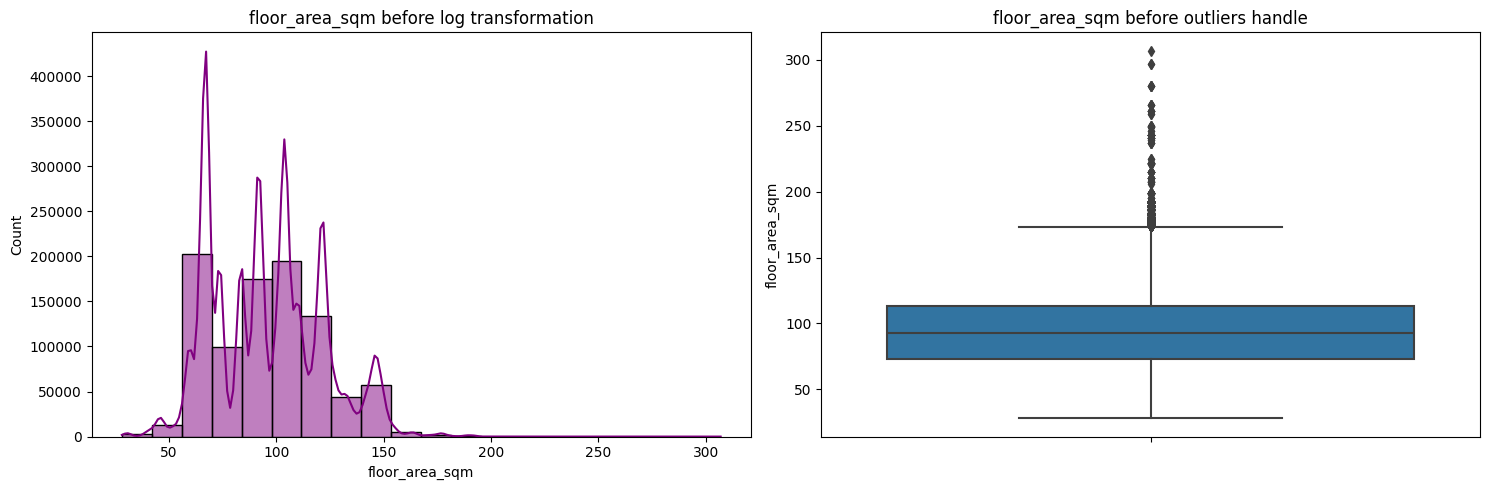

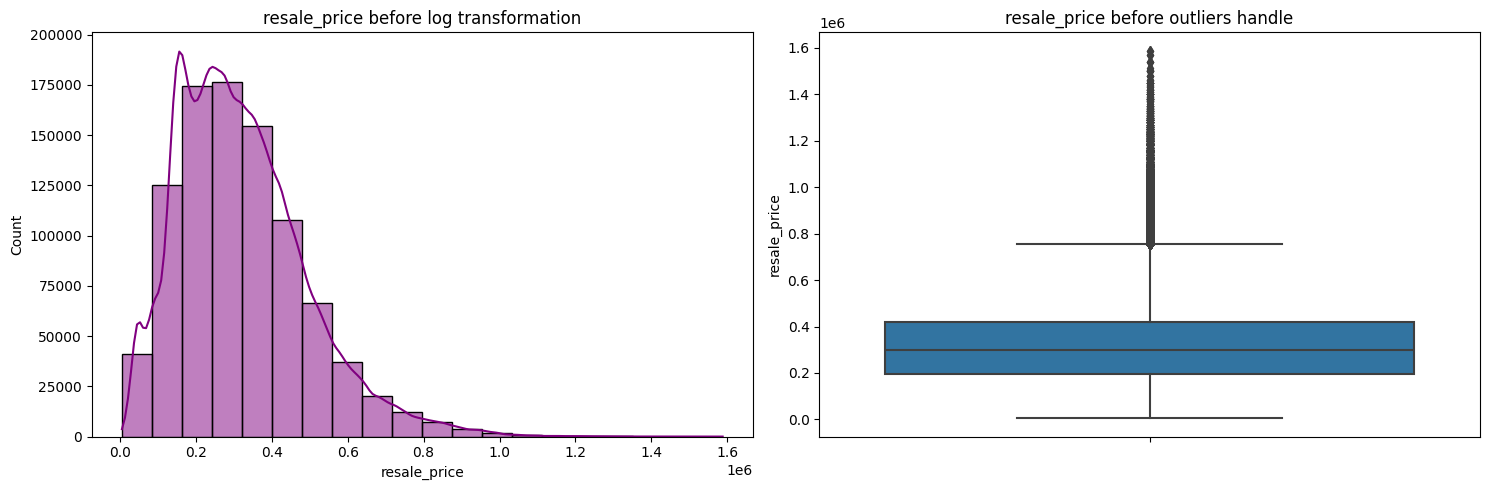

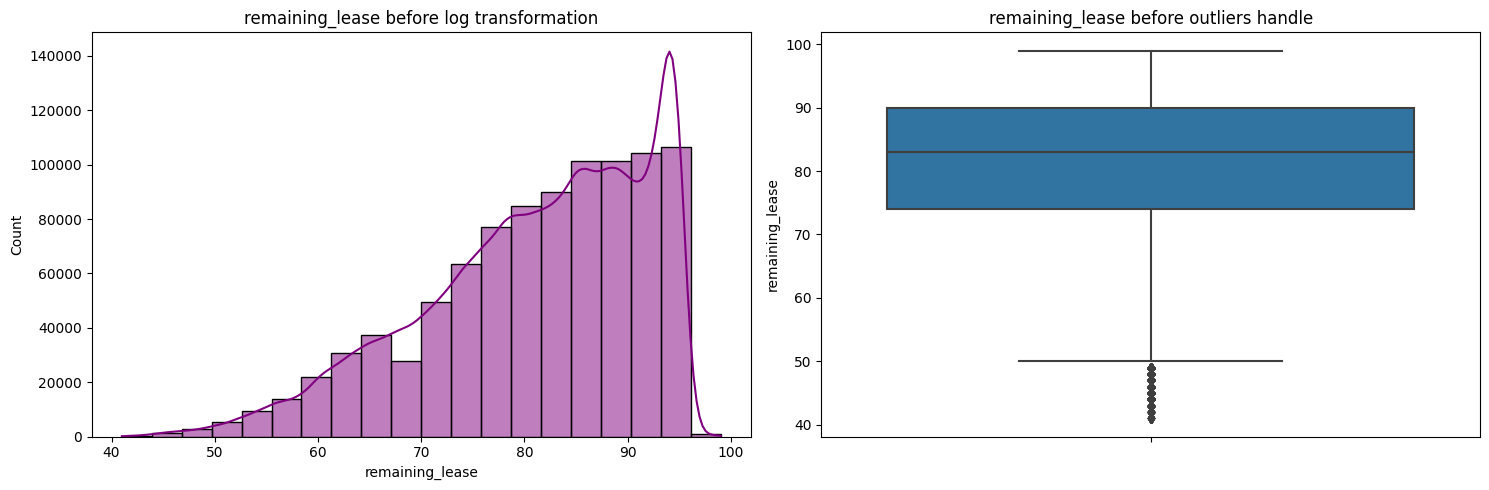

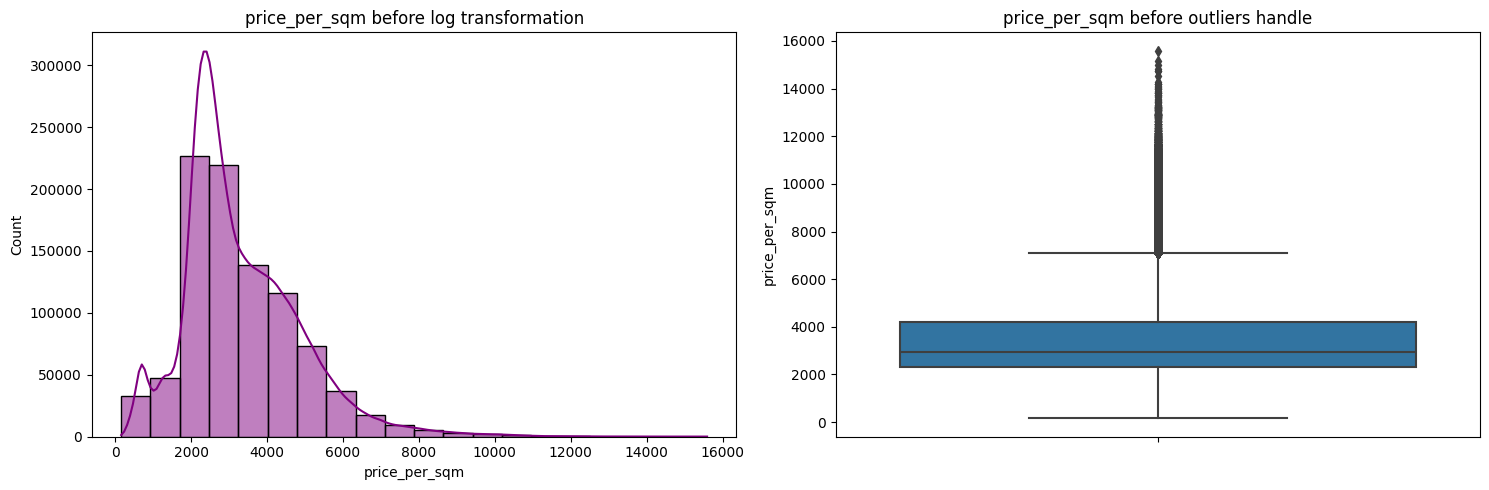

In [29]:
col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)


In [30]:
# after log transformation and outliers handle
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(15,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0],color="purple")
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col2} after outliers handle")

        plt.tight_layout()
        plt.show()


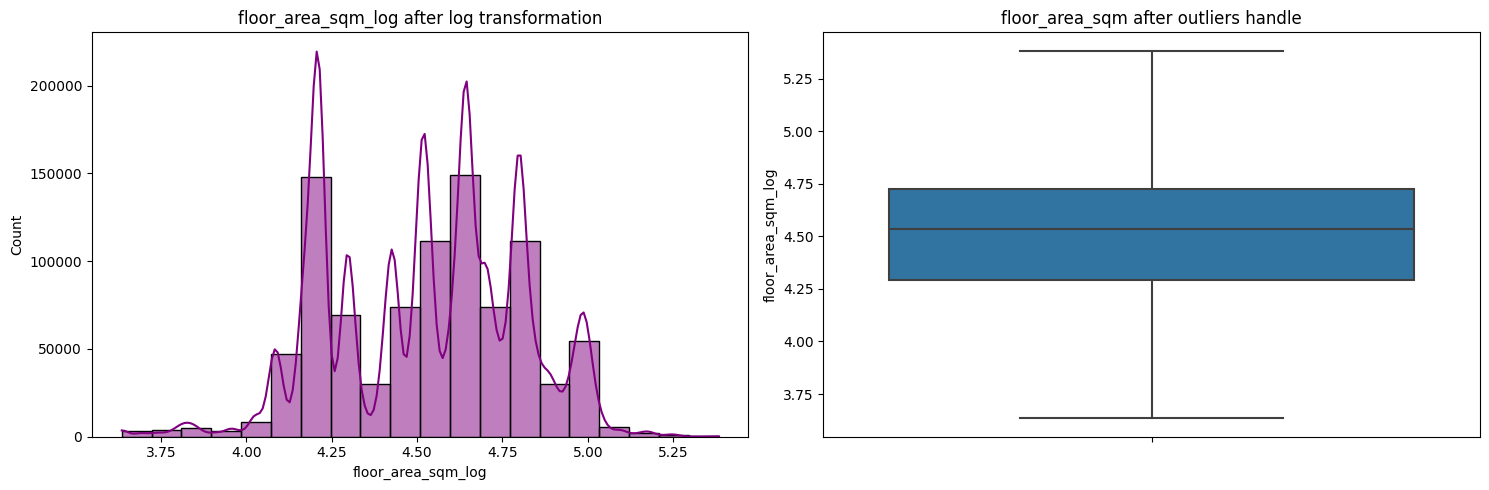

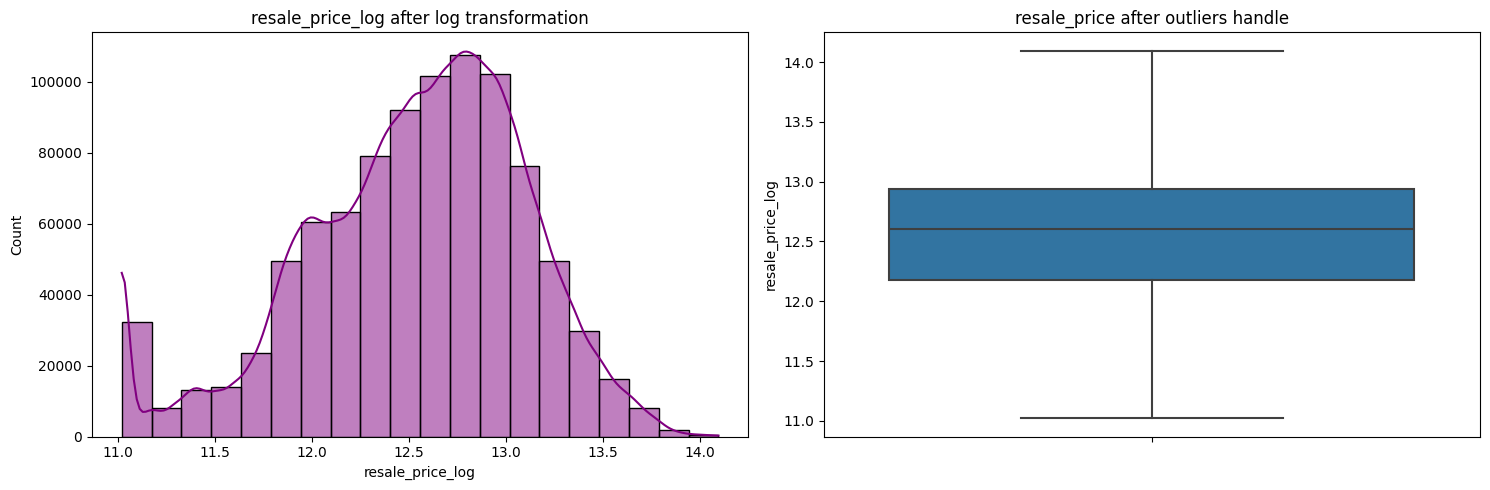

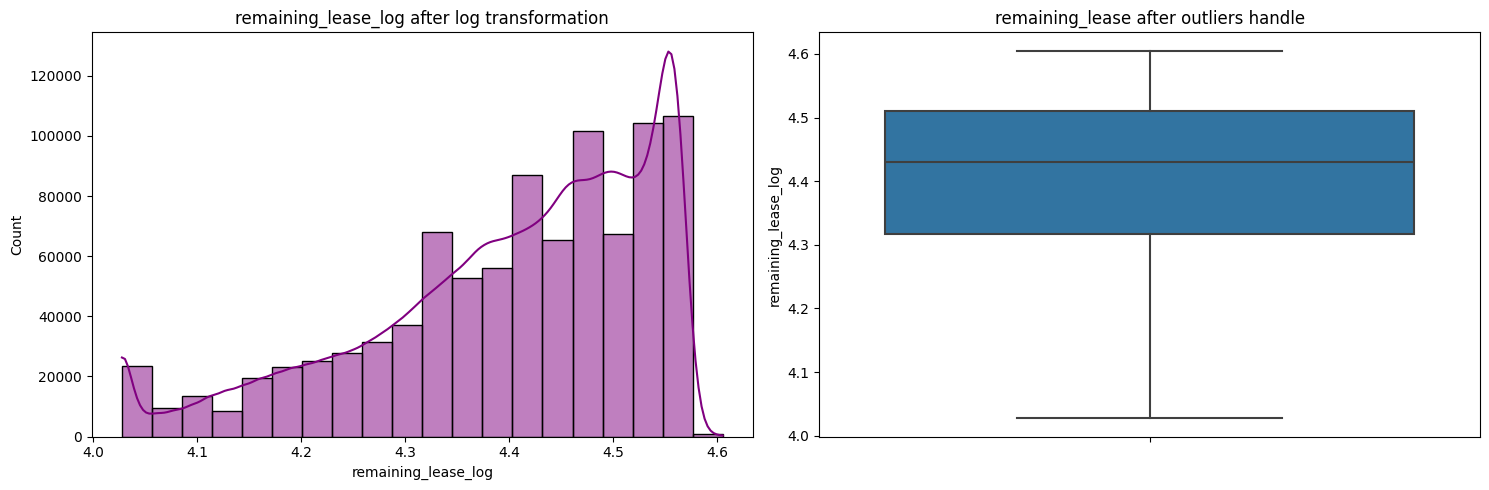

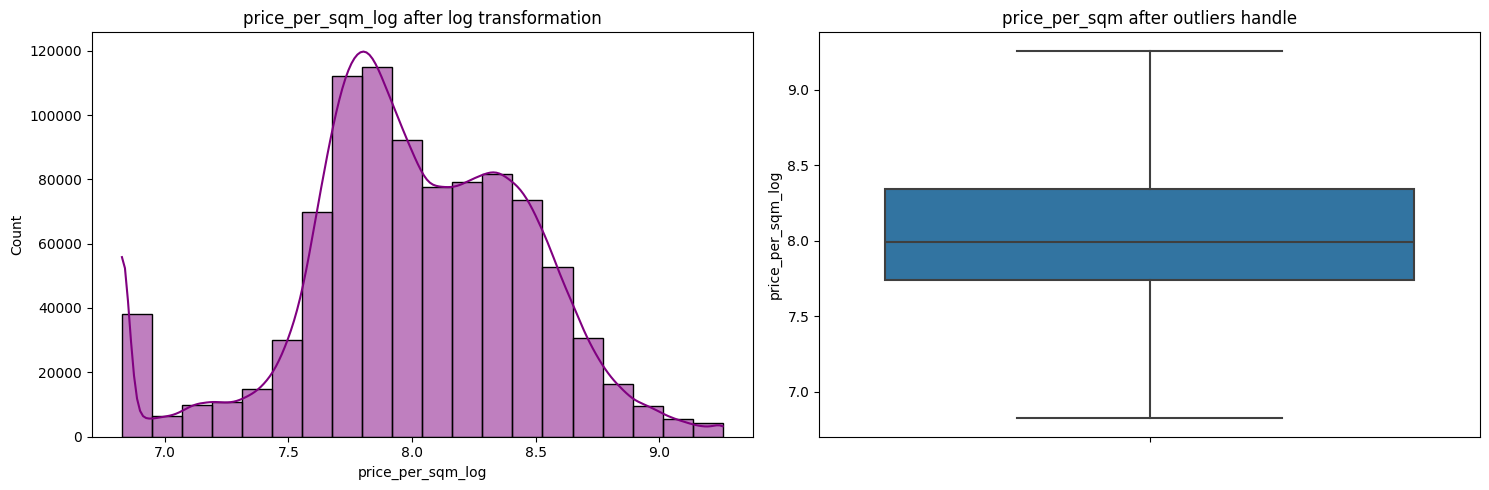

In [31]:
col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)


In [32]:
#drop the columns 
df.drop(columns=['street_name', 'floor_area_sqm','resale_price','remaining_lease','price_per_sqm'],inplace=True)


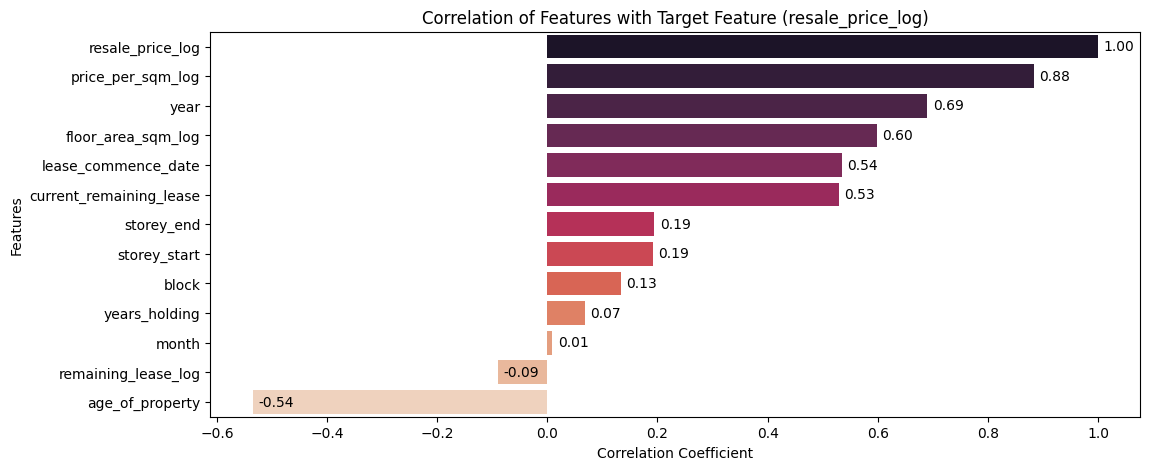

In [33]:
#Correlation of Features with barplot

corr_plt = df[['month', 'block', 'floor_area_sqm_log', 'lease_commence_date', 'resale_price_log', 'remaining_lease_log',
               'year', 'storey_start', 'storey_end', 'price_per_sqm_log', 'years_holding', 'current_remaining_lease',
               'age_of_property']].corr()

target_corr = corr_plt['resale_price_log'].sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=target_corr.values, y=target_corr.index, palette='rocket')
plt.title('Correlation of Features with Target Feature (resale_price_log)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

# Annotate bars with correlation values
for i, v in enumerate(target_corr.values):
    ax.text(v + 0.01, i, f'{v:.2f}', color='black', va='center')

plt.show()


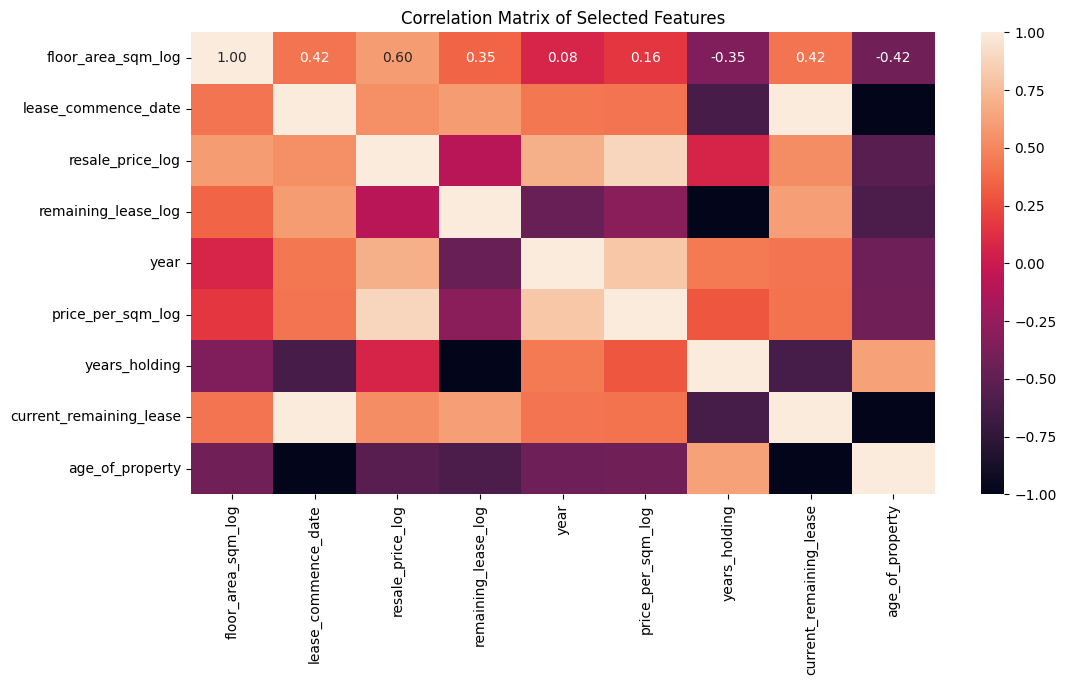

In [34]:
#  correlation analysis - Heatmap
selected_cols = [ 'floor_area_sqm_log', 'lease_commence_date', 'resale_price_log', 'remaining_lease_log',
                 'year', 'price_per_sqm_log', 'years_holding', 'current_remaining_lease',
                 'age_of_property']

# Calculating the correlation matrix
corr_matrix = df[selected_cols].corr()

# Creating a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


#  Data_Modeling

In [35]:
df_new=df.copy()
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Index: 929802 entries, 0 to 929852
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    929802 non-null  int64  
 1   town                     929802 non-null  object 
 2   flat_type                929802 non-null  object 
 3   block                    929802 non-null  int64  
 4   flat_model               929802 non-null  object 
 5   lease_commence_date      929802 non-null  int64  
 6   year                     929802 non-null  int64  
 7   storey_start             929802 non-null  int64  
 8   storey_end               929802 non-null  int64  
 9   years_holding            929802 non-null  int64  
 10  current_remaining_lease  929802 non-null  float64
 11  age_of_property          929802 non-null  int64  
 12  floor_area_sqm_log       929802 non-null  float64
 13  resale_price_log         929802 non-null  float64
 14  remaining

In [36]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)


In [37]:
df_new['town'].unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [38]:
encoding(df_new,'town')


ANG MO KIO : 0
BEDOK : 1
BISHAN : 2
BUKIT BATOK : 3
BUKIT MERAH : 4
BUKIT PANJANG : 5
BUKIT TIMAH : 6
CENTRAL AREA : 7
CHOA CHU KANG : 8
CLEMENTI : 9
GEYLANG : 10
HOUGANG : 11
JURONG EAST : 12
JURONG WEST : 13
KALLANG/WHAMPOA : 14
LIM CHU KANG : 15
MARINE PARADE : 16
PASIR RIS : 17
PUNGGOL : 18
QUEENSTOWN : 19
SEMBAWANG : 20
SENGKANG : 21
SERANGOON : 22
TAMPINES : 23
TOA PAYOH : 24
WOODLANDS : 25
YISHUN : 26


In [39]:
df['flat_type'].unique()


array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI-GENERATION'], dtype=object)

In [40]:
encoding(df_new,'flat_type')


1 ROOM : 0
2 ROOM : 1
3 ROOM : 2
4 ROOM : 3
5 ROOM : 4
EXECUTIVE : 5
MULTI-GENERATION : 6


In [41]:
df_new['flat_model'].unique()


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'ADJOINED FLAT', 'PREMIUM MAISONETTE',
       'MODEL A2', 'DBSS', 'TYPE S1', 'TYPE S2', 'PREMIUM APARTMENT LOFT',
       '3GEN'], dtype=object)

In [42]:
encoding(df_new,'flat_model')


2-ROOM : 0
3GEN : 1
ADJOINED FLAT : 2
APARTMENT : 3
DBSS : 4
IMPROVED : 5
IMPROVED-MAISONETTE : 6
MAISONETTE : 7
MODEL A : 8
MODEL A-MAISONETTE : 9
MODEL A2 : 10
MULTI GENERATION : 11
NEW GENERATION : 12
PREMIUM APARTMENT : 13
PREMIUM APARTMENT LOFT : 14
PREMIUM MAISONETTE : 15
SIMPLIFIED : 16
STANDARD : 17
TERRACE : 18
TYPE S1 : 19
TYPE S2 : 20


In [43]:
df_new[['town','flat_type','flat_model']]=df_new[['town','flat_type','flat_model']].astype('int64')
df_new.head()


,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.0216,4.465908,6.826507
1,1,0,0,309,5,1977,1990,4,6,13,52.0,47,3.635067,11.0216,4.465908,6.826507
2,1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,11.0216,4.465908,6.826507
3,1,0,0,309,5,1977,1990,7,9,13,52.0,47,3.635067,11.0216,4.465908,6.826507
4,1,0,2,216,12,1976,1990,4,6,14,51.0,48,4.290459,11.0216,4.454347,6.826507


In [44]:
df


,month,town,flat_type,block,flat_model,lease_commence_date,year,storey_start,storey_end,years_holding,current_remaining_lease,age_of_property,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,10,12,13,52.0,47,3.635067,11.021600,4.465908,6.826507
1,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,4,6,13,52.0,47,3.635067,11.021600,4.465908,6.826507
2,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,10,12,13,52.0,47,3.635067,11.021600,4.465908,6.826507
3,1,ANG MO KIO,1 ROOM,309,IMPROVED,1977,1990,7,9,13,52.0,47,3.635067,11.021600,4.465908,6.826507
4,1,ANG MO KIO,3 ROOM,216,NEW GENERATION,1976,1990,4,6,14,51.0,48,4.290459,11.021600,4.454347,6.826507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929848,7,YISHUN,5 ROOM,755,IMPROVED,1986,2024,4,6,38,61.0,38,4.804021,13.415033,4.127134,8.611012
929849,7,YISHUN,EXECUTIVE,406,MAISONETTE,1988,2024,4,6,36,63.0,36,4.997212,13.630144,4.158883,8.632932
929850,7,YISHUN,EXECUTIVE,406,APARTMENT,1988,2024,10,12,36,63.0,36,4.955827,13.638773,4.158883,8.682946
929851,7,YISHUN,EXECUTIVE,792,APARTMENT,1987,2024,7,9,37,62.0,37,4.990433,13.617060,4.143135,8.626627


# Regression model - To predict resale value

In [45]:
#split the data into x and y 

x=df_new.drop(['resale_price_log'],axis=1)
y=df_new['resale_price_log']

x.shape,y.shape


((929802, 15), (929802,))

## train_test_split 
- divides the dataset into two parts: one for training the model of ML and the other for testing its performance.
-  helps evaluate how well the model performs on new, unseen data.
- Purpose - Evaluating the model perfomance of new data

In [46]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results        


In [47]:
# using above function try to identify the best algorithm - [highest R² score as the best algorithm]

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, results = best_ML_algorithm(x,y, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)


**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.008062            0.000937                 0.030609  0.997193
DecisionTreeRegressor             0.001348            0.000165                 0.012864  0.999504
RandomForestRegressor             0.001034            0.000086                 0.009299  0.999741
ExtraTreesRegressor               0.001168            0.000098                 0.009913  0.999706
**Best Algorithm:** RandomForestRegressor


In [48]:
# Random forest regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.0010204446255897164
Mean Squared Error: 8.405495859063701e-05
Root Mean Squared Error: 0.009168149136583512
R-squared: 0.9997481332343844


In [49]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.0012659054138354914
Mean Squared Error: 0.00013790327883257103
Root Mean Squared Error: 0.011743222676615267
R-squared: 0.9995867792526494


In [50]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores


price_per_sqm_log          0.797935
floor_area_sqm_log         0.191738
flat_type                  0.010067
block                      0.000086
town                       0.000050
month                      0.000028
year                       0.000015
storey_end                 0.000014
age_of_property            0.000012
remaining_lease_log        0.000011
years_holding              0.000010
lease_commence_date        0.000010
flat_model                 0.000009
storey_start               0.000009
current_remaining_lease    0.000008
dtype: float64

In [51]:
# store the model using pickle

with open('Decisiontreemodel.pkl','wb') as files:
    pickle.dump(model_regressor,files)


In [52]:
#load the pickle and predict the selling price with regressor model

with open('Decisiontreemodel.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[1,0,0,309,5,1977,1990,10,12,13,52.0,47,3.635067,4.465908,6.828872]]))
np.exp(predict[0])


61181.484314048685